In [1]:
#Use fork that removes @tf.function from the GradCAM code to make it compatible with tf 2.3.x
!pip install git+https://github.com/palatos/tf-explain

  Cloning https://github.com/palatos/tf-explain to /tmp/pip-req-build-28xpokc5
  Created wheel for tf-explain: filename=tf_explain-0.2.1-py3-none-any.whl size=42303 sha256=a139859e1e6168e8d9f9dc13e038c4e7b3ef9984c49b9837d54d40f4ff5ce2a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-ja1s5ooe/wheels/4e/dc/ea/fe2a682e7b8690854aa7786be893493d3c653840d639ed1edd
Successfully built tf-explain


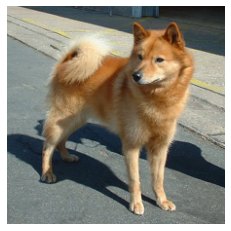

In [2]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import requests
from io import BytesIO
import numpy as np
from matplotlib import pyplot as plt

#Get an image for the example

url = 'https://upload.wikimedia.org/wikipedia/commons/2/27/Finnish_Spitz_600.jpg'
response = requests.get(url)
image = Image.open(BytesIO(response.content)).convert('RGB')
image = np.array(image.resize((224,224)))

def show(im):
    plt.figure(facecolor='white')
    plt.imshow(im)
    plt.axis('off')

show(image)

In [3]:
input_shape = (224, 224, 3)
inputs = keras.Input(shape=input_shape)

x = tf.keras.layers.experimental.preprocessing.RandomRotation(0.5)(inputs)
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255.)(x)
x = tf.keras.layers.Convolution2D(32,(3,3))(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
out = tf.keras.layers.Dense(2,activation = 'softmax')(x)
model = keras.Model(inputs, out)

In [4]:
#Meaningless prediction since the model hasn't been fine tuned yet, but it's just for the example.
prepared_image = np.expand_dims(image,0)
print('meaningless example prediction -', model.predict(prepared_image))

meaningless example prediction - [[0.5100572  0.48994276]]


In [5]:
import tf_explain
explainer = tf_explain.core.GradCAM()

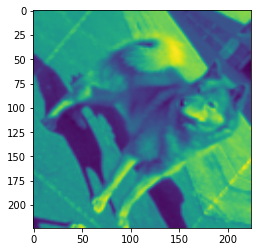

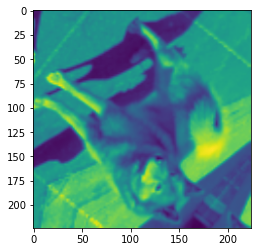

In [ ]:
#Generate 3 GradCAM heatmaps.
#Because the network was not trained the image is pretty much just passing untouched.
#But notice how the augmentation layer is active and making the image rotate. 
for i in range(3):
    grid = explainer.explain((prepared_image,None), model, class_index=1, image_weight=0)
    plt.imshow(grid)
    plt.show()

In [ ]:
#If we expicitly pass the training = False option to the agumentation layer it understands
#it is not supposed to be acting now.

input_shape = (224, 224, 3)
inputs = keras.Input(shape=input_shape)

x = tf.keras.layers.experimental.preprocessing.RandomRotation(0.1)(inputs, training = False)
x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255.)(x)
x = tf.keras.layers.Convolution2D(32,(3,3))(x)
x = tf.keras.layers.MaxPool2D((2,2))(x)
x = tf.keras.layers.Flatten()(x)
out = tf.keras.layers.Dense(2,activation = 'softmax')(x)
model = keras.Model(inputs, out)

In [ ]:
for i in range(3):
    grid = explainer.explain((prepared_image,None), model, class_index=1, image_weight=0)
    plt.imshow(grid)
    plt.show()